# K-means

In [26]:
from sklearn.cluster import MiniBatchKMeans

## 1. Choix du vecteur

In [28]:
# Choose vector
doc_vectors = nmf_doc_vectors

# For title
vec_type = 'NMF'
vec_opt = n_topics_nmf

## 2. Lancement k-means

In [29]:
# K-means options
k = 50
random_state = 1

In [30]:
# Run
kmeans = MiniBatchKMeans(n_clusters=k, random_state=random_state)
kmeans.fit(doc_vectors);
kmeans_clusters = kmeans.predict(doc_vectors)

In [33]:
# Calcul des scores
print('Inertie = {:.2f}, Calisnki-Harabasz = {:.2f}, Davies-Bouldin = {:.2f}'.format(
    kmeans.inertia_,
    calinski_harabasz_score(doc_vectors,kmeans_clusters),
    davies_bouldin_score(doc_vectors,kmeans_clusters)))

Inertie = 45.64, Calisnki-Harabasz = 45.00, Davies-Bouldin = 1.07


## 3. Affichage UMAP

In [36]:
# Embedding umap
embedding = UMAP(n_neighbors=20, min_dist=0.5, random_state=12).fit_transform(doc_vectors)

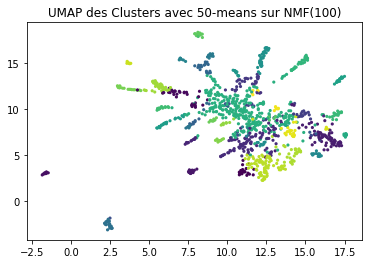

In [39]:
# Affichage
plt.scatter(embedding[:, 0], embedding[:, 1], 
    c = kmeans_clusters,
    s = 10, # size
    edgecolor='none')
plt.title("UMAP des Clusters avec {}-means sur {}({})".format(k,vec_type,vec_opt));